Perform a sentiment analysis: Classify whether feedback left on a website is either positive or negative
* Dataset = Dataset of sentiment labelled sentences from UCI Machine Learning database
* https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

Task: 
* Pick one company datafile and build own classifier
* test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Dataset is from yelp.com
* 1 = positive
* 0 = negative

Filter through each review and find negative ones--> build a classifier

In [2]:
df_raw = pd.read_csv('yelp_labelled.txt', header = None, sep = r"\t", engine = 'python')
df_raw.columns = ['review', 'rating']
df_raw.head(10)


,review,rating
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


Task is to engineer features from the reviews. In order to determine reviews with negative ratings (0), we need to make a list of keywords that are commonly associated with it. 

Feature from the review can be whether it contains a certain word. We can try to add these keywords as new columns to the dataframe. 

In [18]:
# add spaces around key so that we are getting the word and 
# not just matching pattern
keywords = ['nasty', 'angry', 'disgusted', 'overpriced', 'slow', 'bad', 
            'shocked', 'waste', 'never', 'worst', 'sucks', 'sick', 
            'do not', 'struggle', 'poor', 'gross', 'bland', 'rude', 
            'dirty', 'blows', 'lacking', 'stinks', 'boring', 'avoid',
           'very bad', 'not that good', 'mediocre', 'rarely', 'zero', 
           'missing', 'none', 'horrible', 'not again', 'wrong', 'below average']

for key in keywords: 
    df_raw[str(key)] = df_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

If we needed to add new features, we can just add them to the keyword list. 

In order to avoid errors due to messiness and inconsistency, make all reviews in caps. 

In [19]:
df_raw['allcaps'] = df_raw.review.str.isupper()

Turn the rating column into boolean/binary so we can compare statistically.
* this will change everthing to true or false

In [20]:
df_raw['rating'] = (df_raw['rating'] == 0)

Naive Bayes: 
    * first assumption = all variables in model are independent of one another. 
    * we can check if this is true with the correlation matrix and heatmap

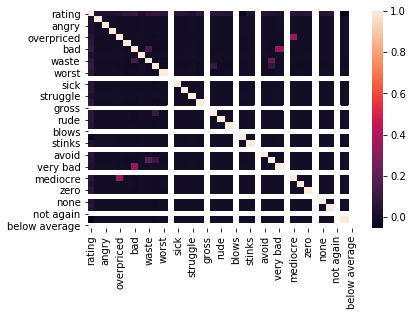

In [21]:
sns.heatmap(df_raw.corr())

Majority of the correlations look very close to 0 (black).
Most of words show trong independence from each other. 

Need to build training data. 
* outcome (y/dependent variable)--> target
* input (x/independent variable)--> data

In [22]:
data = df_raw[keywords + ['allcaps']]
target = df_raw['rating']

Our data is binary(boolean) since there are only two options {True, False}.
We can use SKLearn to create our model

In [23]:
from sklearn.naive_bayes import BernoulliNB

# create our bernoulli model and store it in new variable
bnb = BernoulliNB()

# Fit our model into the data with our x and y variables
bnb.fit(data, target)

# classify and store it into a new variable
y_pred = bnb.predict(data)

# Display our results
print("Number of errors out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of errors out of a total 1000 points : 413


error is nearly half which is a lot. 
* can add more key words